<center>
<h1>Chapter Eight</h1>
</center>

<hr>

## Set-up

First bring in your library.

In [2]:
github_name = 'MarvNC'
repo_name = 'cs523'
source_file = 'library.py'
url = f'https://raw.githubusercontent.com/{github_name}/{repo_name}/main/{source_file}'
# !rm $source_file
# !wget $url
# %run -i $source_file
from library import *

In [3]:
type(find_random_state), type(titanic_transformer)

(function, sklearn.pipeline.Pipeline)

In [4]:
titanic_variance_based_split, customer_variance_based_split  #(107, 113)

(107, 113)

In [5]:
#just to be sure you match mine

titanic_variance_based_split = 107
customer_variance_based_split = 113

# I. Our first machine learning algorithm: linear regression

In this chapter we will start the second part of the course, exploring machine learning models to predict (AKA classify). I know I said we would concentrate on binary classification, and we will. But it is a little easier to start with an algorithm called linear regression, which can be used to predict numerical values in general, e.g., Age, price of stock, etc.

In [6]:
url = 'https://raw.githubusercontent.com/fickas/asynch_models/refs/heads/main/datasets/titanic_trimmed.csv'
titanic_trimmed = pd.read_csv(url)

In [7]:
titanic_features = titanic_trimmed.drop(columns='Survived')
titanic_features.head()  #print first 5 rows of the table

,Age,Gender,Class,Joined,Married,Fare
0,41.0,Male,C3,Southampton,0.0,7.0
1,21.0,Male,Crew,Southampton,0.0,0.0
2,13.0,Male,C3,Southampton,NaN,20.0
3,16.0,Male,C3,Southampton,0.0,NaN
4,NaN,Male,C2,Cherbourg,0.0,24.0


In [8]:
labels = titanic_trimmed['Survived'].to_list()

And split using the `random_state` value we found last chapter.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(titanic_features, labels, test_size=0.2, shuffle=True,
                                                    random_state=titanic_variance_based_split, stratify=labels)

In [24]:
X_train.head()

,Age,Gender,Class,Joined,Married,Fare
460,45.0,Female,C3,Southampton,0.0,7.0
643,5.0,Male,C3,Southampton,0.0,27.0
802,31.0,Female,Crew,Southampton,0.0,221.0
788,22.0,Female,C2,Southampton,0.0,26.0
582,36.0,Male,C2,Southampton,0.0,10.0


In [10]:
y_train[:10]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 0]

# X. Run the pipeline.

## Remember want to transform train and test separately

To avoid data leakage.

In [11]:
X_train_transformed = titanic_transformer.fit_transform(X_train, y_train)  #fit with train

[Pipeline] ........ (step 1 of 9) Processing map_gender, total=   0.0s


[Pipeline] ......... (step 2 of 9) Processing map_class, total=   0.0s
[Pipeline] ..... (step 3 of 9) Processing target_joined, total=   0.0s
[Pipeline] ......... (step 4 of 9) Processing tukey_age, total=   0.0s
[Pipeline] ........ (step 5 of 9) Processing tukey_fare, total=   0.0s
[Pipeline] ......... (step 6 of 9) Processing scale_age, total=   0.0s
[Pipeline] ........ (step 7 of 9) Processing scale_fare, total=   0.0s
[Pipeline] ............ (step 8 of 9) Processing impute, total=   0.0s
[Pipeline] ....... (step 9 of 9) Processing passthrough, total=   0.0s


/home/default/_school/cs523/library.py:1117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_[target] = y


In [12]:
X_train_transformed.head().round(2)

,Age,Gender,Class,Joined,Married,Fare
460,0.79,1.0,1.0,0.4,0.0,-0.26
643,-1.32,0.0,1.0,0.4,0.0,0.61
802,0.05,1.0,0.0,0.4,0.0,3.74
788,-0.42,1.0,2.0,0.4,0.0,0.57
582,0.32,0.0,2.0,0.4,0.0,-0.13


|index|Age|Gender|Class|Joined|Married|Fare|
|---|---|---|---|---|---|---|
|460|0\.79|1\.0|1\.0|0\.4|0\.0|-0\.26|
|643|-1\.32|0\.0|1\.0|0\.4|0\.0|0\.61|
|802|0\.05|1\.0|0\.0|0\.4|0\.0|3\.74|
|788|-0\.42|1\.0|2\.0|0\.4|0\.0|0\.57|
|582|0\.32|0\.0|2\.0|0\.4|0\.0|-0\.13|

In [13]:
X_test_transformed = titanic_transformer.transform(X_test)

In [14]:
X_test_transformed.head().round(2)

,Age,Gender,Class,Joined,Married,Fare
1105,-0.05,1.0,1.0,0.35,0.0,0.43
791,-0.95,1.0,2.0,0.40,0.0,1.13
984,1.00,1.0,3.0,0.61,1.0,2.74
418,0.21,0.0,2.0,0.40,0.0,0.57
103,-0.37,0.0,2.0,0.40,0.0,0.00


|index|Age|Gender|Class|Joined|Married|Fare|
|---|---|---|---|---|---|---|
|1105|-0\.05|1\.0|1\.0|0\.35|0\.0|0\.43|
|791|-0\.95|1\.0|2\.0|0\.4|0\.0|1\.13|
|984|1\.0|1\.0|3\.0|0\.61|1\.0|2\.74|
|418|0\.21|0\.0|2\.0|0\.4|0\.0|0\.57|
|103|-0\.37|0\.0|2\.0|0\.4|0\.0|0\.0|

# II. Simple linear regression

We can (and will shortly) use linear regression with multiple feature columns and one label column. But I am going to simplify the problem by assuming we have a table with only one feature column. Let's assume it is the `Age` column.

And I assume our label column will be `Fare`. So our goal is to build an algorithm that can predict `Fare` given `Age`. Linear regression would be a good place to start with this problem.

Here is our algorithm: pretty simple, right?

<img src='https://www.dropbox.com/s/uxq0lu4nu4n0ads/Screen%20Shot%202021-09-17%20at%202.07.06%20PM.png?raw=1' height=100>

`y-hat` is the fare we predict given an age of `x`. The values of `m` and `b` are values we have to discover, i.e., learn. The general idea is to keep trying values of `m` and `b` until we find ones that give us good predictions.

## What is a good prediction?

On the surface, it is how far off our predicted fares are from the real fares. Remember this is a supervised learning problem. We know the real values of the fares.

The general approach is to compute an "error" (sometimes called loss) that is the square of the difference between what we predict (the y-hat) and the actual value (y without the hat). If we have 1000 samples, then we will get 1000 squared differences. We take the mean of those to get something called the Mean Squared Error or MSE.

<img src='https://www.dropbox.com/s/5xgxywc6wo18qx2/Screen%20Shot%202021-09-17%20at%202.36.53%20PM.png?raw=1' height=100>

Note there are other error or loss functions possible and we may see them in future, i.e., the error function is not cast in stone to be MSE.

### Let's do some computation to see how it works

In [15]:
ages = X_train_transformed['Age'].to_list()
fare_labels = X_train_transformed['Fare'].to_list()  #the yi values

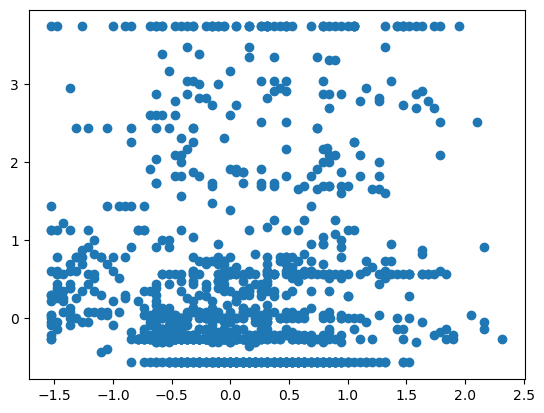

In [16]:
import matplotlib.pyplot as plt

plt.scatter(ages,fare_labels)
plt.show()

## Good luck with that!

We are looking for a line that is close to most points. Nice if all the points were grouped together. Kind of like this.

<img src='https://www.dropbox.com/s/0xrcgiafl4hm1z1/Screen%20Shot%202022-10-19%20at%202.57.36%20PM.png?raw=1' height=200>

But let's give it a go anyway.

And notice I switched notation on you a bit, from `(yi-yhat)**2` to `(yhat-yi)**2`. I did it to be more consistent with next set of formulas we will look at.

Also, I'll start calling `m` as `w` instead to match formulas below.

In [17]:
w = .5   #total guess
b = .05  #total guess
predictions = [age*w+b for age in ages]
errors_squared = [(yhat-yi)**2 for yhat,yi in zip(predictions, fare_labels)]
mse = sum(errors_squared)/len(errors_squared)
mse

1.7508242869565716

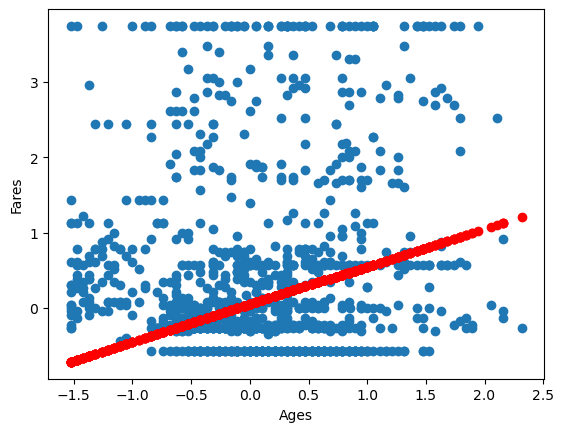

In [18]:
ax = plt.axes()
ax.scatter(ages, fare_labels)
ax.plot(ages, predictions, 'ro')

ax.set_xlabel('Ages')
ax.set_ylabel('Fares')

plt.show()

## We have a goal: minimize MSE

Choose values for `w` and `b`, our parameters, that minimize the MSE.

Let's try increasing the weight.

In [19]:
w = .6   #increase
b = .05  #stays same
predictions = [age*w+b for age in ages]
errors_squared = [(yhat-yi)**2 for yhat,yi in zip(predictions, fare_labels)]
mse = sum(errors_squared)/len(errors_squared)
mse

1.785862959427222

That was worse than 1.7513294373063293. Let's try the other way.

In [20]:
w = .4   #decrease
b = .05  #stays same
predictions = [age*w+b for age in ages]
errors_squared = [(yhat-yi)**2 for yhat,yi in zip(predictions, fare_labels)]
mse = sum(errors_squared)/len(errors_squared)
mse

1.7272095152905644

Better.

## Let's see if we can get a picture of the curve

I'll generate a list of weights and keep b constant.

In [21]:
wi = np.arange(-5, 5, 0.001)  #a bunch of guesses for the weight
b = .5  #another guess

In [22]:
wi

array([-5.   , -4.999, -4.998, ...,  4.997,  4.998,  4.999])

### A couple helper functions

`X` is the feature values, ages in our case.

`Y` is the label values, fares in our case.

In [23]:
def predict(X, w, b):
  yhat = [(x*w+b) for x in X]
  return yhat

def MSE(Y, Yhat):
  sdiffs = [(yhat-y)**2 for y,yhat in zip(Y,Yhat)]
  mse = sum(sdiffs)/len(sdiffs)
  return mse

### Compute yhat and mse for different weights in wi

In [24]:
pairs = []
for w in wi:
  yhat = predict(ages, w, b)
  mse = MSE(fare_labels, yhat)
  pairs.append((w, mse))

In [25]:
min(pairs, key=lambda pair: pair[1])

(0.19300000000173423, 1.4968432168494916)

So with a weight of .19 we got an mse of 1.5, which was the minimum mse out of all the weights we tried.

### Plot

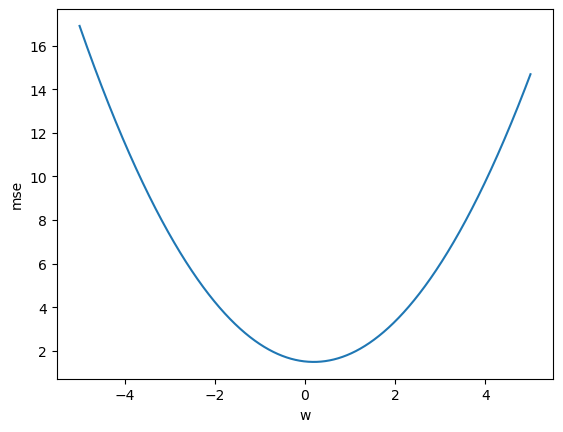

In [26]:
ax = plt.axes()
ax.plot([w for w,_ in pairs], [m for _,m in pairs])
ax.set_xlabel('w')
ax.set_ylabel('mse')
plt.show()

## Looks good so what's the problem?

We can just try a list of weights and find the one with the least MSE. Choose it.

The problem is that we really have 2 values to find, weight and bias.

You say, so? Write nested for loops that try all combinations and find best MSE.

<pre>
for w in wi:
   for b in bi:
      ...
</pre>

## The problem is we have a whole row to predict Fare

Why just use Age? (Simple Linear Regression) Why not use all the values in the row (Multiple Linear Regression)?

<img src='https://miro.medium.com/max/2210/1*iz5-6i0TG23UxeExvT3qeg.png' height=200>

Each value will have its own weight. So if we have 7 columns to predict Fare, we will have 7 different weights to contend with.

Large numbers of nested loops is getting a bit much. I think there is a better way that works with both Simple and Multiple Linear Regression.

Instead of blindly searching, we will try to learn. Big switch!

# The foundations of learning: gradient descent

I think it is worth going into some detail about this now given it will crop up again later. We are looking for a principled way to learn from our mistakes. Our mistakes are called errors or loss. MSE is a means to quantify our mistakes.

## But how do we learn from our mistakes????

I want to switch focus to learning from individual mistakes. So don't compute all the errors first before considering how to change. Instead, look at individual errors, on a single row, and try to adjust weight and bias from the single error.

### Here's a plot that may help.

<img src='https://www.dropbox.com/scl/fi/gq7mmcr3yyoscmxce1mbi/Loss-MSE-function-Gradient-Descent-using-Backpropagation-with-respect-to-each-Weight.png?rlkey=viuvkpz8n4zhzo3tgmi71j0k3&raw=1' height=300>

I have a separate plot for the weight and bias. Let's focus on the weight for now:

* The x axis represents different weights we can try.

* The y axis represensts the squared error for the weights.

* The curve is unknown to us. Shown as a nice bell curve here. But could be any type of convex curve.

* The minimum value `m` (the minimum error we can achieve) is unknown to us.

## Let's think about point pi

We chose some weight, computed yhat, took the difference with actual y, and squared to get an error value. So the weight and error give us point pi.

### Question: looking at the plot, should we increase or decrease w, given we are at point pi?

## Let's think about point pi+j on other side

We chose some weight, computed yhat, took the difference with actual y, and squared to get an error value.

### Question: looking at the plot, should we increase or decrease w given at pi+j?

The problem is you don't get to see this plot. Without the curve, you can't tell me whether to increase or decrease given some arbitrary point, right?


## Diffie-Q to the rescue!


Here is my idea. We can get the slope (using the derivative) at any point on the curve using differential equations. And that slope will be either negative or positive.

* If it is negative (like line on left) then we want to increase the weight. We are moving down the left hand side of the curve.

* If it is positive (like line on right), then we want to decrease the weight. We are moving down the right hand side of the curve.

Furthermore, the steepness of the slope tells us how far to move.

<img src='https://miro.medium.com/max/1400/1*N5WjbzwsCFse-KPjBWZZ6g.jpeg' height=150>

So win-win. We know direction to move and how much to move in that direction!

## What we are left with is computing the slope (gradient)

Choosing a row with a specific set of values `xi` (an age), `yi` (actual fare), `w` (weight), `b` (bias), compute the slope at the point (w,se), where `se = (yhat-yi)**2 = ((w * xi + b) - yi )**2`.

We can use differential equations to get the slope at this point. It's a little bit complicated given we actually have (a) nested functions, and (b) 2 parameters to vary, `w` and `b`. For the nested functions problem, we will have to use the chain rule. For the 2 parameter problem, we will have to use partial differential equations and look at each separately.

As a reminder of the chain rule, it looks like this:

<img src='https://www.dropbox.com/s/slqxz32445m7gya/Screen%20Shot%202021-09-23%20at%202.59.03%20PM.png?raw=1' height=200>

In our case `f` is `(yhat-yi)**2` and `g` is `yhat` which is `((xi*w+b))`.

We have 2 parameters to worry about, `w` and `b`. Let's focus on the value of `b`. So we are after the slope, using derivates, for point (b,se) where we hold w constant. In terms of partial differential equations and the chain rule, it looks like this, where L is se (squared error).

<img src='https://www.dropbox.com/s/igvgqm7tuq8zqm7/Screen%20Shot%202021-09-23%20at%2011.22.56%20AM.png?raw=1' height=50>.

In words, the derivate of the loss L with respect to b (i.e., the slope at point (b,se)) is equal to (i) the derivate of L with respect to yhat (the outer function f) times (ii) the derivate of yhat with respect to b (the inner function).

Now we need to compute the 2 derivates on the right of the equation. Using the power rule, the outer part (i.e., `(yhat-yi)**2`) is given by:

<img src='https://www.dropbox.com/s/nx1w7ksmh4awrsw/Screen%20Shot%202021-09-23%20at%2011.28.53%20AM.png?raw=1' height=50>

The inner part, where `yhat = w*xi+b`, is simply:

<img src='https://www.dropbox.com/s/ex6qem7zahu7mvp/Screen%20Shot%202021-09-23%20at%2012.03.18%20PM.png?raw=1' height=50>

Why 1? Because I can ignore `w*xi` - it has no term involving `b`. I'm left with `1*b` whose derivative is `1`.

So the derivate with respect to b is given by `2*(yhat-yi)*1`. Once we plug in values to get yhat, we get the slope or gradient at (b,se).

### How about derivate for w?

It is similar when looking at derivate of other parameter `w` (view `w1` as plain `w`):

<img src='https://www.dropbox.com/s/2nxl57gy2cf0fer/Screen%20Shot%202021-09-23%20at%2012.06.17%20PM.png?raw=1' height=50>

Outer is still `2*(yhat-yi)`. But inner has changed. Reminder that inner function is `(w * xi + b)`. We can ignore the b term. So left with derivate of `w*xi`. It is just `xi`.

<img src = 'https://www.dropbox.com/s/urtjgv6cn974kq4/Screen%20Shot%202021-09-23%20at%2012.02.19%20PM.png?raw=1' height=50>

In code terms, we have:
<pre>
outer_yhat = 2*(yhat-yi)  #same for both b and w
inner_w = xi
inner_b = 1
gradient_w = outer_yhat * inner_w #chain rule
gradient_b = outer_yhat * inner_b #chain rule
</pre>


<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg'
height=50 align=center>


Let's check out the gradient at a specific point. Fill in below.



In [27]:
xi = ages[0]  #using this to predict Fare
w = .4
b = .05
yi = fare_labels[0]  #the actual value of Fare we can check against
yhat = (w*xi+b)
se = (yhat - yi)**2
print(yhat, yi, se)  #0.36578947368421055 -0.2608695652173913 0.39270155103707927

0.36578947368421055 -0.2608695652173913 0.39270155103707927


In [29]:

#your code below - copy and paste above should do it

outer_yhat =  2*(yhat - yi) #same for both b and w
inner_w = xi
inner_b = 1
gradient_w = outer_yhat * inner_w #chain rule
gradient_b = outer_yhat * inner_b #chain rule


In [30]:
(gradient_w, gradient_b)  #(0.9894616403709502, 1.2533180778032036)


(0.9894616403709502, 1.2533180778032036)


Next question: should we add or subtract these gradients to move loss closer to 0? From the x-y plot above, we can see the point on the right has a positive slope and we want to decrease `w` and `b` to move to left. So if we subtract we will get a negative and actually subtract the gradients. That is what we want. And vice versa for point on left. So what we want is this:
<pre>
w = w - lr * gradient_w
b = b - lr * gradient_b
</pre>
Cool. We will now move in the correct direction and by the correct magnitude. But what's up with that `lr`?

## The learning rate

It is typical to tamp down weight changes. The problem is that raw gradients will swing you all over the place. The bottom shows this graphically. The top shows what happens when use small learning rate and bottom with large (i.e., close to 1.0) learning rate.

<img src='https://www.dropbox.com/s/hqcpkam704j58yk/Screen%20Shot%202021-09-23%20at%2012.15.20%20PM.png?raw=1' height=200>

The choice for the learning rate is up to you. I will use `lr=.001` but it is something you can experiment with.



## We can now compute new w and b

Notice both slopes are positive so we will decrease both w and b. And from our prior messing around, that looked like a winning move at least for w.

In [31]:
lr = .001
w = w - lr*gradient_w  #will decrease w in our case
b = b - lr*gradient_b  #will decrease b in our case
yhat = ages[0]*w+b
error_squared = (yhat - yi)**2
error_squared  #0.39015584957150207 (prior 0.39270155103707927)

0.39015584957150207

## Whew!

Looks like we are on right track. We did decrease the error.

# II. Stochastic Gradient Descent (SGD)

Using the SGD method for getting to the right w and b values means adjusting w and b after every row. So we don't wait to compute MSE at end, we actually adjust after every row. Here is a function that does this for us.

In [32]:
#X is list of ages, Y is list of fare_labels, w is starting weight, b is stating bias, lr is learning rate

def sgd(X,Y,w,b,lr=.001):
  for i in range(len(X)):
    #get values for rowi
    xi = X[i]  #e.g., age on rowi
    yi = Y[i]  #e.g., actual fare on rowi

    yhat = w*xi+b  #prediction

    #loss = (yhat - yi)**2 = ((w*xi+b) - yi)**2, i.e., f(g(x,w,b),yi)
    #dloss/dw = dl/dyhat * dyhat/dw by the chain rule
    #dloss/dyhat = 2*(yhat - yi) by the power rule (first part of chain)
    #dyhat/dw = d((w*xi+b) - yi)/dw = xi (second part of chain)

    gradient_w = 2*(yhat-yi)*xi  #take the partial derivative wrt w to get slope

    #for b same first part of chain but then #dyhat/db = d((w*xi+b) - yi)/db = 1 for second part of chain

    gradient_b = 2*(yhat-yi)*1   #take the partial derivative wrt b to get slope

    w = w - lr*gradient_w  #if len(X) is 2000, will change 2000 times
    b = b - lr*gradient_b

  #return the last w and b of the loop
  return w,b


## This function will give us final values for w and b

After it runs through all rows. So it will do many adjustments to w and b.

In [33]:
w1,b1 = sgd(ages, fare_labels, .5, .5)  #could also just choose random starting values for w and b
print(w1,b1)  #0.2989362264334249 0.52546747073015

0.2989362264334249 0.52546747073015


### Compute MSE

In [34]:
yhats = predict(ages, w1, b1)  #using w1 and b1 we got from sgd
MSE(fare_labels, yhats)  #1.5033350952606843

1.5033350952606828

## Big question: can we do better?

We have an MSE of 1.5 (rounded). Is there a way to reduce that?

### Big idea: keep running SGD function.

So don't stop with just one go-through of rows. Do it again and again. But start each new call with the w and b from previous call.

# Idea of epoch

Each time we run through the entire set of rows is called an epoch. And we don't re-initialize `w` and `b`! We pass on the values from epoch1 to epoch2. You typically need many epochs to get good results.

But how do you know if you have enough epochs? If you choose 100 maybe 200 would give you even better results.

You can use the MSE as a measure. If the MSE is not going down very much (or at all), then you are likely good to go.

I'll try 100 epochs. And I will keep track of the MSE for each epoch.

### Video note

Values below will be slightly different than video. However, the main points raised in the video still hold true. Let me know if confused.

In [35]:
w = .5
b = .5
mse = []
epochs = 100
for i in range(epochs):
  w,b = sgd(ages, fare_labels, w, b)  #note start with w and b from past epoch
  yhats = predict(ages, w, b)
  mse.append(MSE(fare_labels, yhats))

In [36]:
min(mse)  #1.4972186612188838

1.4972186612188862

In [37]:
np.argmin(mse)  #so we got the least error at epoch 27

26

In [38]:
#look at last 10

mse[-10:]  #holding steady - just slightly worse than best

[1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862,
 1.4972186612188862]

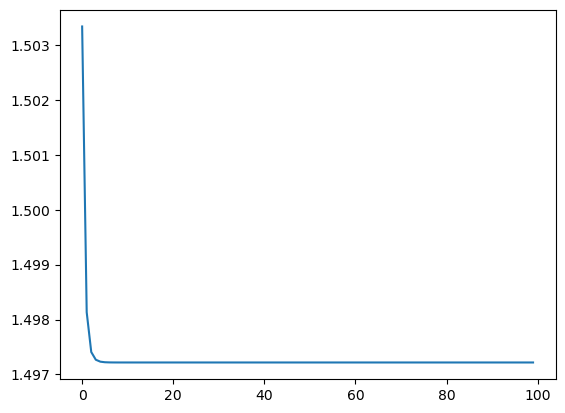

In [39]:
import matplotlib.pyplot as plt
plt.plot(mse, scaley=True)
plt.show()

### Flattens out quickly

This agrees with where we found the min.

# Last step: testing

So we trained our model, i.e., computed what look like good values for `w` and `b`. Let's try those on the data we held out in the test set.

In [40]:
(w,b)  #last values computed in training - (w,b)  (0.20755603099245457, 0.5373887976208882)

(0.21027198788989468, 0.5374403223023213)

In [41]:
X = X_test_transformed['Age'].to_list()  #notice using test data not training data
Y = X_test_transformed['Fare'].to_list()
Yhat = predict(X, w, b)
MSE(Y, Yhat)  #1.5755483777709391, best from training: 1.4973830317612864

1.5761173212387063

Worse on testing. Very typical.

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg'
height=50 align=center>

We looked at predicting fare from age. Let's try the reverse: predict age from fare. You might think you will get roughly the same MSE. But don't be too sure :)

Hint: you should be able to copy code from above and just edit to try on this new problem.



In [42]:
w = .5
b = .5
epochs = 100

In [44]:
#your code
mse = []

for i in range(epochs):
  w, b = sgd(fare_labels, ages, w, b)
  yhats = predict(fare_labels, w, b)
  mse.append(MSE(ages, yhats))

In [45]:
min(mse), np.argmin(mse)  #(0.5601494980426618, 1) - found on 2nd epoch so remaining 98 did no better

(0.5595616850439885, 1)

In [46]:
mse[-10:]  #worse - [0.5602262156087735, ...

[0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193,
 0.5596302860679193]

Kind of interesting. Best we got trying to predict fare from age was `1.4973830317612864
`. Going other way, a lot better.

## Note: you have enough now to work on challenges 1 and 2

If you want to pause the video here and work on those 2, no problem.

# Idea of batch

Within a single epoch, the concept of batch crops up. It says how many rows do we want to look at before actually changing `w` and `b`. With stochastic gradient descent, we have a batch size of 1: we change weights after every row. Let's look at the other extreme: we change weights only once, after we have seen all rows, i.e., we do one change per epoch.

Notice what we are doing. We are collecting changes but not making them. We average the changes and use it to update.

In [47]:
def full_batch(X,Y,w,b,lr=.001):
  gw = []
  gb = []
  for i in range(len(X)):
    xi = X[i]
    yi = Y[i]
    yhat = w*xi+b  #prediction
    gradient_w = 2*(yhat-yi)*xi
    gradient_b = 2*(yhat-yi)*1
    gw.append(gradient_w)  #just collect change, don't make it
    gb.append(gradient_b)
  w = w - lr*sum(gw)/len(gw)  #Now average and make the change.
  b = b - lr*sum(gb)/len(gb)
  return w,b

### Try full-batch for 100 epochs

In [48]:
X = X_train_transformed['Age'].to_list()
Y = X_train_transformed['Fare'].to_list()

In [49]:
w = .5
b = .05
mse = []
epochs = 100
for i in range(epochs):
  w,b = full_batch(X, Y, w, b)
  Yhat = predict(X, w, b)
  mse.append(MSE(Y, Yhat))

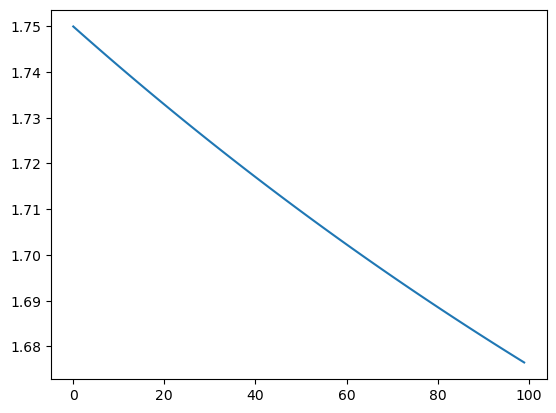

In [50]:
import matplotlib.pyplot as plt
plt.plot(mse, scaley=True)
plt.show()

In [51]:
np.argmin(mse), min(mse)  #from last epoch so looks like still going down - add more epochs?

(99, 1.6765024468667988)

In [52]:
mse[-10:]  #best from 100 x sgd:  1.4973830317612864

[1.6821356520133508,
 1.6815005960867508,
 1.6808678464689522,
 1.6802373944316196,
 1.6796092312803306,
 1.6789833483544412,
 1.6783597370269527,
 1.6777383887043786,
 1.6771192948266131,
 1.6765024468667988]

### Still going down

Let's increase epochs and see if it levels out.

In [53]:
w = .5
b = .05
mse = []
epochs = 1000
for i in range(epochs):
  w,b = full_batch(X, Y, w, b)
  Yhat = predict(X, w, b)
  mse.append(MSE(Y, Yhat))
(w,b)

(0.3031690891240295, 0.44489869366099344)

In [54]:
np.argmin(mse), min(mse)

(999, 1.507868342296874)

In [55]:
mse[-10:]  #still going down!

[1.5081511821734335,
 1.5081193798861927,
 1.508087672217826,
 1.508056058862328,
 1.508024539514757,
 1.5079931138712321,
 1.5079617816289297,
 1.507930542486077,
 1.5078993961419511,
 1.507868342296874]

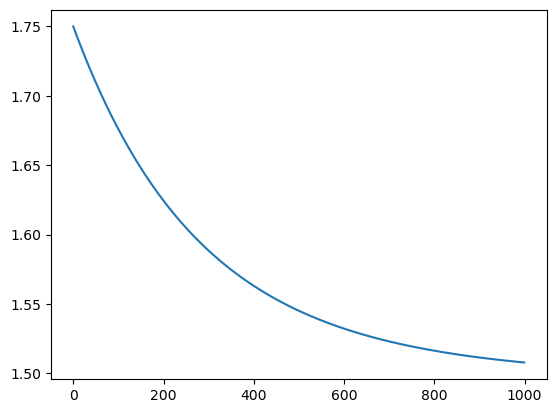

In [56]:
import matplotlib.pyplot as plt
plt.plot(mse, scaley=True)
plt.show()

100 x SGD still better than 1000 x full-batch.


# Last step: testing

So we trained our model, i.e., computed what look like good values for w and b. Let's try those on the data we held out in the test set.

In [57]:
(w,b)  #last values computed from full-batch at 1000 epochs

(0.3031690891240295, 0.44489869366099344)

In [58]:
X = X_test_transformed['Age'].to_list()
Y = X_test_transformed['Fare'].to_list()
Yhat = predict(X, w, b)
MSE(Y, Yhat)  #1.5976846580111859 - best from training: 1.5081800105509628


1.5976846580111868

### Again, training better

Typical.

### Discussion

Full batch has the benefit of avoiding updating the weights constantly. And it might have a smoothing effect and not jump all over the place: it averages all the gradients to get one change.

It has the problem of potentially taking many more epochs than plain sgd so it all might average out.

There is a compromise called mini-batch. It says take k rows before doing update. If k=1 you have SGD. If k=all rows then you have full batch. You can choose other values between. Mini-batch is the typical way people train their models. The tough part is choosing k.

Also note that there are alternatives to gradient descent. Here is one recent idea based on [Direct Feedback Alignment](https://arxiv.org/abs/2011.12428). No derivatives involved!

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg'
height=50 align=center>

This tests out your Gemini skills. See if you can find the linear regression model in sklearn and then train it using `X` and `y` below.

Notice the hoops I had to jump through with reshaping to get data in shape for the sklearn model. Kind of a pain.

<pre>
a = np.array([ 1.,  2.,  3.,  4.,  5.,  6.])
a.reshape(-1,1)
array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])
</pre>
But it kind of makes sense. Normally each row would have 6 features, not just 1. So we need an array to hold each row.



In [60]:
X = X_train_transformed['Age'].to_numpy().reshape(-1, 1)  #see example above for reshape action
y = X_train_transformed['Fare'].to_numpy().reshape(-1, 1)

In [ ]:
#Find the model to import then train it using X and y (ages and fares)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)  #fit the model to the data

(array([[0.19146863]]), array([0.5170777]))

In [ ]:
#This is way we can get w and b from the trained model

print(model.coef_, model.intercept_)  #[[0.18813259]] [0.51682211] - I am getting different results here on different runs. Unclear why.



<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg'
height=50 align=center>

Go ahead and get predictions. Remember that reshaping issue.

And remember you are predicting on the test set not the training set.



In [ ]:
#google for method that will give you predictions from a model
predictions =


In [ ]:
print(predictions[:5])

<pre>
[[0.5069204 ]
 [0.33859124]
 [0.7049547 ]
 [0.55642898]
 [0.44751011]]
 </pre>

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg'
height=50 align=center>

Last step. Ask Gemini about sklearn and mean square error function. Apply it to `predictions` you have. You will see that sklearn out did us. Has lower mse.



In [ ]:

mse =

In [ ]:
print(mse)  #1.5703918246214141 vs home grown 1.5971286308679484

### Looks like sklearn beating our home-grown!

# X. Logistic Regression

We have been looking at linear regression, where our target column is continuous (as opposed to categorical or binary). We can modify linear regression to get to a new algorithm that is good for binary prediction in particular, e.g., the `Survived` column. The new algorithm is called Logistic Regression. All it does is add another step to computing yhat. So we still do this:
<pre>
yraw = xi*w+b
</pre>
But we now add:
<pre>
yhat = sigmoid(yraw)  #value between 0 and 1 inclusive
</pre>
I'll give you a brief rundown of the sigmoid function (also called the logistic function). Its definition is below.
<pre>
S(x) = 1/(1 + e**-x)
</pre>
Here is its plot:

<img src='https://www.dropbox.com/s/o49viq5kz4lgm15/Screen%20Shot%202021-09-24%20at%208.49.07%20AM.png?raw=1' height=200>

So the x axis is the raw output from `xi*w+b`. That gets mapped to values between 0 and 1 on the y axis.


## New loss/cost function

The typical loss function used with logistic regression is as follows (fancy name is *cross-entropy loss*):

<img src='https://www.dropbox.com/s/2mwvgbp0mfxwkgs/Screen%20Shot%202021-09-24%20at%208.57.36%20AM.png?raw=1' height=75>

Where `hθ(x)` is `x*w+b` which is the raw output of linear regression. And `y` is the actual value, i.e., the binary label.

This new cost function is not exactly intuitive. I am going to point you to a good tutorial if you want to dig deeper: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a.


## New functions mean expanding chain rule

Gradient descent does not change. It just gets a bit more complicated. Before we were computing partial derivatives for MSE. Now we have cross-entropy loss. And further complicating things, we have added the sigmoid function into the mix. So now we have something like f(g(h(x))), i.e., 3 nested functions where f is loss, g is sigmoid and h is raw linear. But good news, the chain rule still works. And all 3 functions have derivatives. I'll skip the details but give you a place to follow along if interested.

### But just for giggles, derivate of sigmoid

<pre>
S(x) = 1/(1 + e**-x)

dS(x)/dx = S(x)*(1 - S(x))
</pre>

[Here is derivation in long hand](https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/).

### Further reading

I found [this paper](https://web.stanford.edu/~jurafsky/slp3/5.pdf) a good intro with examples of the various aspects of logistic regression.

We will put the logistic regression algorithm to use in the next chapter.

# III. Summary

We introduced concepts that we will see over and over. The idea of training on one set then testing on another. The idea of gradient descent to accomplish "learning". The use of a learning rate to moderate changes. The ideas of batch and epochs used during training.

We saw that we need a cost or loss function. For linear regression that is typically MSE. For logistic regression that is typically cross-entropy loss.

One reason I like starting with the relatively simple examples of linear and logistic regression is because they have many of the features found in the highly touted concept of deep learning. We will get to deep learning later in the course, and can look back at concepts here as a grounding.

# Challenge 1

Compute `gradient_w` and `gradient_b` for xi = `ages[1]`. Use given weight values to start with.

Use `(yhat - yi)**2` as squared error function.


In [ ]:
ages = X_train_transformed['Age'].to_list()
fare_labels = X_train_transformed['Fare'].to_list()  #the yi values

In [ ]:
ages[:10]  #Reminder what in ages

In [ ]:
fare_labels[:10]  #Reminder what in fares (what we are tring to predict)

In [ ]:
#starting values

xi = ages[1]
w,b = (0.4587647933330355, 0.002021042256967478)
lr = .001

In [ ]:
#your code below to compute 2 gradients



In [ ]:
(gradient_w, gradient_b)  #(3.185032883898595, -2.420624991762932)

### Notice positive slope

So on right hand side of curve. Need to move left, i.e., decrease weights.

### Compute new weight values


In [ ]:
#your code below
w =
b =


In [ ]:
(w,b)  #new: (0.4555797604491369, 0.004441667248730409), old: (0.4587647933330355, 0.002021042256967478)

They are smaller. That's what we expect.

# Challenge 2

Bring in customer database.

Then follow steps below.


## Step 1.

Split then pipeline both pieces. You should have value of `random_state` from prior notebook.


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPM6PqZXgmAHfRYTcDZseyALRyVwkBtKEo_rtaKq_C7T0jycWxH6QVEzTzJCRA0m8Vz0k68eM9tDm-/pub?output=csv'

In [ ]:
customers_df = pd.read_csv(url)
customers_trimmed = customers_df.drop(columns='ID')  #this is a useless column which we will drop early
customers_trimmed = customers_trimmed.drop_duplicates(ignore_index=True)  #get rid of any duplicates
customers_trimmed.head()

In [ ]:
customers_features = customers_trimmed.drop(columns=['Rating'])
labels = customers_trimmed['Rating'].to_list()

In [ ]:
#remember to use the random seed that you found earlier
X_train, X_test, y_train, y_test =

### Apply pipeline to X_train and X_test

In [ ]:
X_train_transformed =

In [ ]:
X_train_transformed.head().round(2)

|index|Gender|Experience Level|Time Spent|OS|ISP|Age|Rating|
|---|---|---|---|---|---|---|---|
|586|0\.6|1\.0|0\.5|0\.0|0\.26|-0\.36|0\.0|
|590|0\.0|1\.0|-0\.5|1\.0|0\.28|-0\.6|0\.0|
|137|0\.0|0\.8|-0\.83|0\.2|0\.28|0\.0|0\.0|
|900|1\.0|1\.0|0\.69|0\.6|0\.38|-0\.19|1\.0|
|967|1\.0|0\.0|0\.62|1\.0|0\.38|0\.07|1\.0|

In [ ]:
X_test_transformed =

In [ ]:
X_test_transformed.head().round(2)

|index|Gender|Experience Level|Time Spent|OS|ISP|Age|Rating|
|---|---|---|---|---|---|---|---|
|329|0\.0|1\.0|-0\.39|0\.0|0\.38|-0\.4|0\.0|
|175|0\.6|1\.0|-0\.16|1\.0|0\.34|-0\.2|0\.0|
|756|0\.0|2\.0|-0\.25|0\.0|0\.38|-0\.16|0\.0|
|936|0\.0|0\.0|-1\.64|0\.0|0\.28|-0\.07|1\.0|
|360|1\.0|1\.0|0\.83|1\.0|0\.38|-0\.53|1\.0|

## Step 2.

Plot `Age` (x axis) against `Time Spent`.

In [ ]:
ages = X_train_transformed['Age'].to_list()
time_labels = X_train_transformed['Time Spent'].to_list()  #the yi values

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ages,time_labels)
plt.show()

<img src='https://www.dropbox.com/scl/fi/gs991l1qw6lawc0q845xt/Screenshot-2023-09-08-at-5.20.25-PM.png?rlkey=98qn0xlj5qlrpawk4lajrpmwh&raw=1' height=300>

### It looks better than titanic plot for sure

Points more clustered.


## Step 3.

We are trying to predict `Time Spent` from `Age`. Run `sgd` with 500 epochs. Start with `w=.5` and `b=.5`. Use the default `lr` of `sgd`.

Record MSE for each epoch.

In [ ]:
#your code


In [ ]:
np.argmin(mse), min(mse)  #(np.int64(55), 0.5700791544738669)

In [ ]:
#look at last 10

mse[-10:]  #slightly worse than min!

## Step 4.

Plot epochs (x axis) against MSE values per epoch.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mse, scaley=True)
plt.show()

## Step 5.

Remember best epoch. I'll do this step for you.

In [ ]:
best_epoch = np.argmin(mse)
best_epoch  #55

## Step 6.

We need the w and b that go with the best epoch. Run the loop again but now only for best number of epochs.

In [ ]:
#your code


In [ ]:
(w,b)  #(-0.002657121483286056, 0.046704409344519374)

## Step 7.

Use best w,b to get error using `X_test_transformed`.

No need for loops. We are done training and think we have best values for w and b. Time to test.

In [ ]:
#your code


In [ ]:
mse  #0.5505493458871747 compared with best from training of 0.5700791544738669

So we are doing better on testing. This is atypical.

# Challenge 3

There is another algorithm called mini-batch where you get to set that batch size between SGD (batch=1) and full batch. Let's say you set batch=10. Then you accumulate for 10 rows then adjust weights, acculate next 10 rows then adjust weights, etc.

Build a new function mini_batch that allows you to choose batch size. As reminder, here is the full batch code:

<pre>
def full_batch(X,Y,w,b,lr=.001):
  gw = []
  gb = []
  for i in range(len(X)):
    xi = X[i]
    yi = Y[i]
    yhat = w*xi+b  #prediction
    gradient_w = 2*(yhat-yi)*xi
    gradient_b = 2*(yhat-yi)*1
    gw.append(gradient_w)
    gb.append(gradient_b)
  w = w - lr*sum(gw)/len(gw)
  b = b - lr*sum(gb)/len(gb)
  return w,b
</pre>

One tricky part is that when you choose a value of k as your mini-batch value, k may not divide evenly into n (the length of full dataset). In that case, take the residue and average it and update weights.

In [ ]:
#fill it out

def mini_batch(X,Y,w,b,batch=1,lr=.001):
  assert batch>=1
  assert batch<=len(X)


In [ ]:
X = X_train_transformed['Age'].to_list()
Y = X_train_transformed['Time Spent'].to_list()

In [ ]:
len(X)  #781

## Let's see if we can show that mini_batch covers all bases

In [ ]:
w = .5
b = .05
(full_batch(X,Y,w,b), mini_batch(X,Y,w,b,batch=len(X)))  #mini-batch can simulate full-batch

<pre>
((0.49958844946297865, 0.0500973053438601),
 (np.float64(0.49958844946297865), np.float64(0.0500973053438601)))
 </pre>

In [ ]:
w = .5
b = .05
sgd(X,Y,w,b), mini_batch(X,Y,w,b,batch=1)  #mini-batch can simulate sgd

<pre>
((0.26499131362527334, 0.08688112174484347),
 (np.float64(0.26499131362527334), np.float64(0.08688112174484347)))
 </pre>

## Try it on intermediate value

In [ ]:
w = 0
b = .05
mse = []
batch = int(.05*len(X))  #39
epochs = 1000
for i in range(epochs):
  w,b = mini_batch(X, Y, w, b, batch=batch)
  Yhat = predict(X, w, b)
  mse.append(MSE(Y, Yhat))

In [ ]:
batch  #39

In [ ]:
(w,b)  #(np.float64(0.0030885999040983106), np.float64(0.019853134271679156))

In [ ]:
best_epoch = np.argmin(mse)
(best_epoch, mse[best_epoch])  #(np.int64(18), np.float64(0.5698837838326896))


In [ ]:
mse[-10:]  #worse

<pre>
[np.float64(0.5700555056408864),
 np.float64(0.5700555056408505),
 np.float64(0.5700555056408148),
 np.float64(0.57005550564078),
 np.float64(0.5700555056407456),
 np.float64(0.5700555056407125),
 np.float64(0.5700555056406799),
 np.float64(0.570055505640647),
 np.float64(0.5700555056406141),
 np.float64(0.570055505640583)]
 </pre>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mse, scaley=True)
plt.show()

### Big drop then levels off

<img src='https://www.dropbox.com/scl/fi/e93kkstk0a0fgxdz45041/Screenshot-2025-04-23-at-10.01.18-AM.png?rlkey=7xttflj6nzwrntgt9d66zc4mv&raw=1'>

So 18 is the bottom (best) point.




### Testing

Re-train with best epoch, get the w and b values and plug in to get MSE for test set.

In [ ]:
X = X_train_transformed['Age'].to_list()
Y = X_train_transformed['Time Spent'].to_list()

In [ ]:
#your code


In [ ]:
Yhat = predict(X_test_transformed['Age'].to_list(), w, b)
MSE(X_test_transformed['Time Spent'].to_list(), Yhat)  #0.5488488521821334, best from training: 0.5698837838326896

## Better than training

Atypical.
